# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.regularizers import L2

In [ ]:
boston_housing = tf.keras.datasets.boston_housing

# Tasks

From the dataset, extract training and testing features and labels.

In [ ]:
# Loading 80% of the "Boston Housing" as the training set
data = boston_housing.load_data(test_split=0.2)

Samples contain 13 attributes of houses at different locations around the Boston suburbs in the late 1970s. Targets are the median values of the houses at a location (in k$).

The attributes themselves are defined in the [StatLib website](http://lib.stat.cmu.edu/datasets/boston).

Function returns a tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

Source: [Boston Housing price regression dataset](https://keras.io/api/datasets/boston_housing/)

In [ ]:
# Getting the datasets out of the array of tuples:

# Tuple 0
X_train = data[0][0]
y_train = data[0][1]

# Tuple 1
X_test = data[1][0]
y_test = data[1][1]

# Target arrays are now in shape (num_samples,)
# we might need to reshape them to be (num_samples, 1)
y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [ ]:
# We will define a function to initialize NN

def setup_model():

    # Random seed (to make each run the same unless it's None)
    seed=42

    # Number of units for hidden layers
    units              = 64
    activation         = "relu"
    kernel_initializer = RandomNormal(mean=0.0, stddev=1.0, seed=seed)

    # Instantiation of inputs (size = 13 rows)
    inputs = tf.keras.Input(
        shape=(13,),                  # Column vector with 13 elements
        name="input"                 
    )

    l1 = Dense(
        units=64,
        activation=activation,
        use_bias=True,
        kernel_initializer=kernel_initializer,
        bias_initializer="zeros",
        name="dense_1"
    )

    l2 = Dense(
        units=64,
        activation=activation,
        use_bias=True,
        kernel_initializer=kernel_initializer,
        bias_initializer="zeros",
        name="dense_2"
    )

    l3 = Dense(
        units=1,
        activation=None,
        use_bias=False,
        kernel_initializer="zeros",
        name="dense_3"
    )

    # Linking the layers in functional matter:
    l1_out  = l1(inputs)
    l2_out  = l2(l1_out)
    outputs = l3(l2_out)

    model = Model(inputs=inputs, outputs=outputs, name="model")

    return model

In [ ]:
# Creating first model
model = setup_model()

Print the model summary to get an overview of it in the cell below.

In [ ]:
# Printing out model summary
print(model.summary())


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 13)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 64        
Total params: 5,120
Trainable params: 5,120
Non-trainable params: 0
_________________________________________________________________
None


Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [ ]:
# Compiling the model
model.compile(
    optimizer=Adam(),
    loss=MeanSquaredError(),
    metrics=[MeanSquaredError()]
)


In [ ]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(13, 64) dtype=float32, numpy=
 array([[ 1.58170760e-02, -1.59008694e+00,  1.03594460e-01,
          8.11745942e-01, -1.61035502e+00, -1.57910454e+00,
          6.64125800e-01,  3.47874194e-01,  6.57962024e-01,
          1.91505384e+00,  3.41467291e-01,  4.21525687e-02,
          1.21553111e+00,  2.63143107e-02, -7.96953380e-01,
          9.59298611e-02,  9.72922385e-01,  5.45223296e-01,
          1.11511922e+00,  3.62768918e-01,  2.38749862e+00,
         -9.93865490e-01, -4.48137879e-01, -1.13604808e+00,
         -3.38396072e-01, -5.23240983e-01, -1.50436699e+00,
          1.18599862e-01, -1.17646074e+00, -1.66217291e+00,
         -1.23405695e+00,  9.30915654e-01, -3.24065477e-01,
          2.13955287e-02, -1.32935798e+00, -7.37656713e-01,
         -5.30037023e-02,  1.10656273e+00,  9.83946025e-02,
          9.33613539e-01, -9.61524725e-01, -3.65429461e-01,
         -4.82199192e-01,  2.67920762e-01, -4.16338533e-01,
          1.59620777e-01,  2.5

Fit the model on the train data. 1000 epochs should be more than enough. 

In [ ]:
# Configuring batch size and number of epochs
batch_size = 20
epochs = 1000

In [ ]:
# Fitting the model
story = model.fit(
    X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2
)


17/17 [==============================] - 0s 5ms/step - loss: 11.2434 - mean_squared_error: 11.2129 - val_loss: 22.7337 - val_mean_squared_error: 18.5304
Epoch 502/1000
17/17 [==============================] - 0s 5ms/step - loss: 10.2893 - mean_squared_error: 10.2415 - val_loss: 22.3144 - val_mean_squared_error: 18.4582
Epoch 503/1000
17/17 [==============================] - 0s 6ms/step - loss: 8.2691 - mean_squared_error: 8.2534 - val_loss: 22.1771 - val_mean_squared_error: 18.0097
Epoch 504/1000
17/17 [==============================] - 0s 5ms/step - loss: 9.9646 - mean_squared_error: 9.9439 - val_loss: 30.4719 - val_mean_squared_error: 28.7592
Epoch 505/1000
17/17 [==============================] - 0s 6ms/step - loss: 12.5466 - mean_squared_error: 12.5872 - val_loss: 25.2680 - val_mean_squared_error: 20.6395
Epoch 506/1000
17/17 [==============================] - 0s 9ms/step - loss: 13.8215 - mean_squared_error: 13.8242 - val_loss: 24.1462 - val_mean_squared_error: 20.4490
Epoch 507/1

Finally, evaluate your model on the test data and get the score.

In [ ]:
# Run evaluation:
start = time.time()
evaluation_results = model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=y_test.shape[0]
)
end = time.time()
print(f"Execution time = {(end-start)*1000} ms.")

1/1 [==============================] - 0s 20ms/step - loss: 25.1355 - mean_squared_error: 25.1355
Execution time = 65.13762474060059 ms.


In [ ]:
# Run evaluation:
start = time.time()
evaluation_results = model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=1
)
end = time.time()
print(f"Execution time = {(end-start)*1000} ms.")

102/102 [==============================] - 0s 2ms/step - loss: 25.1354 - mean_squared_error: 25.1354
Execution time = 292.68956184387207 ms.


Further suggestions: 

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model? 

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

In [ ]:
# This function will retrieve and plot all observed model performance metrics

def show_history(s, scale = "linear"):
    
    # Automatically retrieve list of all metrics from history
    metrics = list(s.history.keys())[:len(list(s.history.keys()))//2]

    # Calculate amount of metrics
    nrows = len(metrics)

    # Set figure size to 12 x N*5 (where N is number of metrics [nrows])
    fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(12, 5 * nrows))

    index = -1

    for metric in metrics:
        index+=1

        axs[index].plot(s.history[metric], label=metric)
        axs[index].plot(s.history["val_"+metric], label="val_"+metric)
        axs[index].set_yscale(scale)
        axs[index].legend()
        axs[index].grid(b=True, which="major", axis="y")
        axs[index].set_title("Observed "+metric)
    
    plt.show()
    plt.close()

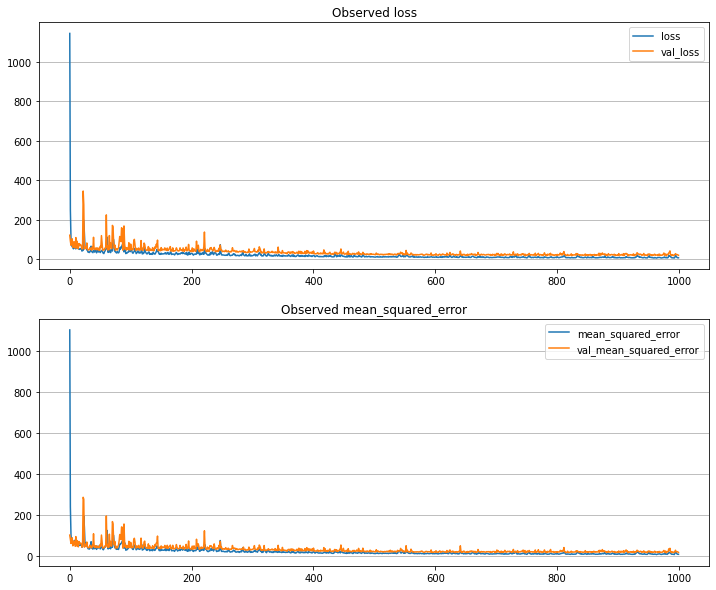

In [ ]:
show_history(story)

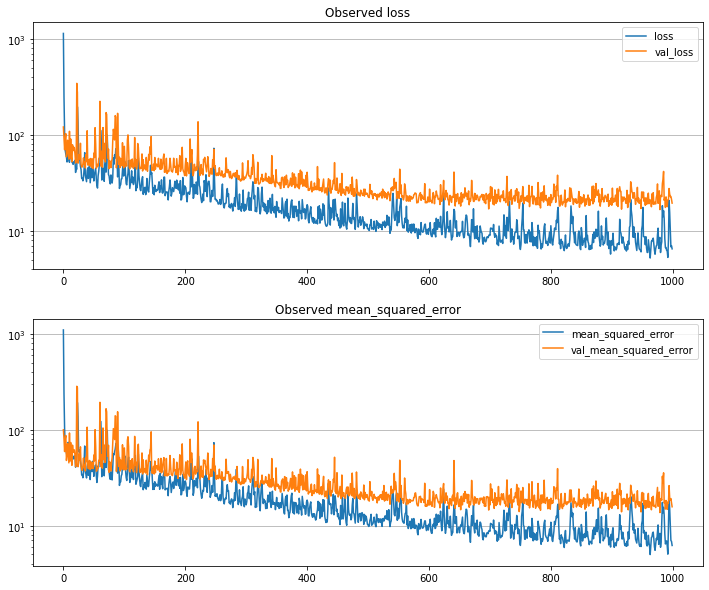

In [ ]:
show_history(story, "log")

> What does this tell you about your model?

Visual inspection of the MSE(=loss) values suggests following:
1. Model minimizes MSE very quickly. 
2. MSE is being improved generally with higher amount of epochs trained.
3. Validated MSE stabilizes and is not much improved after ~ 200 epochs, which suggests that the **model is overfitting**.
4. There's lot of noise in the plots.

We may try following changes to the model:
1. increase the batch_size from 20 to 40 and 100
2. set a non-default step size in ADAM optimizer, lower the value to 0.0001
3. introduce L2 class regularizer
4. introduce Dropout layers
5. play around layer sizes
6. add more layers

In [ ]:
# This is a "pipeline" function that inits, compiles,
# fits and evaluates a model with given batch_size


def run_this(batch_size):
    # Reinitializing the model
    m = setup_model()

    # Compiling the model
    m.compile(optimizer=Adam(), loss=MeanSquaredError(), metrics=[MeanSquaredError()])

    # Fitting the model
    s = m.fit(
        X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2
    )

    show_history(s, "log")

    # Run evaluation:
    m.evaluate(x=X_test, y=y_test, batch_size=y_test.shape[0])

    return m


### Batch_size = 40

In [ ]:
# Configuring batch size and number of epochs
batch_size = 40

9/9 [==============================] - 0s 14ms/step - loss: 16.5688 - mean_squared_error: 16.5880 - val_loss: 39.2744 - val_mean_squared_error: 26.6081
Epoch 502/1000
9/9 [==============================] - 0s 13ms/step - loss: 16.2999 - mean_squared_error: 15.9536 - val_loss: 37.6841 - val_mean_squared_error: 25.4423
Epoch 503/1000
9/9 [==============================] - 0s 13ms/step - loss: 17.1008 - mean_squared_error: 16.8728 - val_loss: 38.6226 - val_mean_squared_error: 28.5974
Epoch 504/1000
9/9 [==============================] - 0s 13ms/step - loss: 16.9112 - mean_squared_error: 16.8847 - val_loss: 37.9125 - val_mean_squared_error: 25.6929
Epoch 505/1000
9/9 [==============================] - 0s 13ms/step - loss: 19.8049 - mean_squared_error: 19.5428 - val_loss: 34.7499 - val_mean_squared_error: 23.4563
Epoch 506/1000
9/9 [==============================] - 0s 12ms/step - loss: 15.1256 - mean_squared_error: 15.3927 - val_loss: 34.7046 - val_mean_squared_error: 24.1106
Epoch 507/100

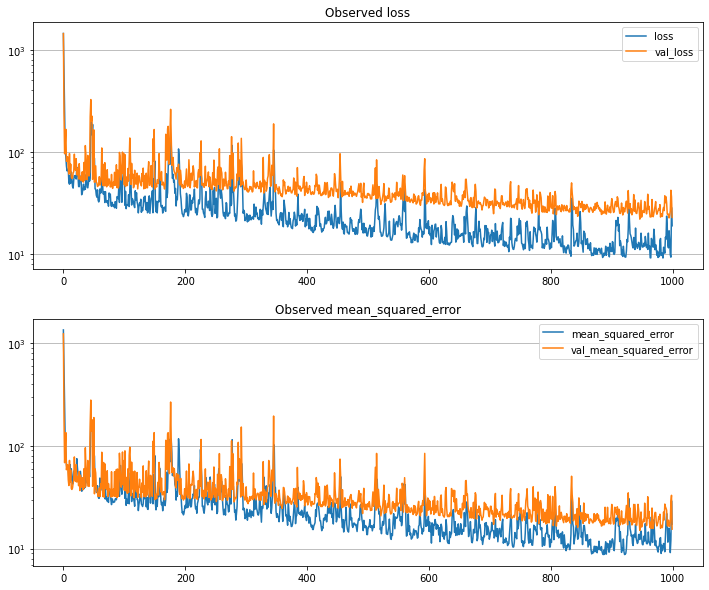

1/1 [==============================] - 0s 152ms/step - loss: 28.6946 - mean_squared_error: 28.6946


In [ ]:
model2 = run_this(batch_size)

### Batch_size = 100

4/4 [==============================] - 0s 27ms/step - loss: 31.5286 - mean_squared_error: 32.7162 - val_loss: 70.1944 - val_mean_squared_error: 70.1944
Epoch 502/1000
4/4 [==============================] - 0s 26ms/step - loss: 33.5493 - mean_squared_error: 32.0510 - val_loss: 70.7570 - val_mean_squared_error: 70.7570
Epoch 503/1000
4/4 [==============================] - 0s 26ms/step - loss: 38.0920 - mean_squared_error: 36.1916 - val_loss: 52.8917 - val_mean_squared_error: 52.8917
Epoch 504/1000
4/4 [==============================] - 0s 26ms/step - loss: 23.2515 - mean_squared_error: 23.7358 - val_loss: 52.3310 - val_mean_squared_error: 52.3310
Epoch 505/1000
4/4 [==============================] - 0s 26ms/step - loss: 22.9670 - mean_squared_error: 23.3985 - val_loss: 46.8324 - val_mean_squared_error: 46.8324
Epoch 506/1000
4/4 [==============================] - 0s 28ms/step - loss: 22.1157 - mean_squared_error: 21.4358 - val_loss: 50.4312 - val_mean_squared_error: 50.4312
Epoch 507/100

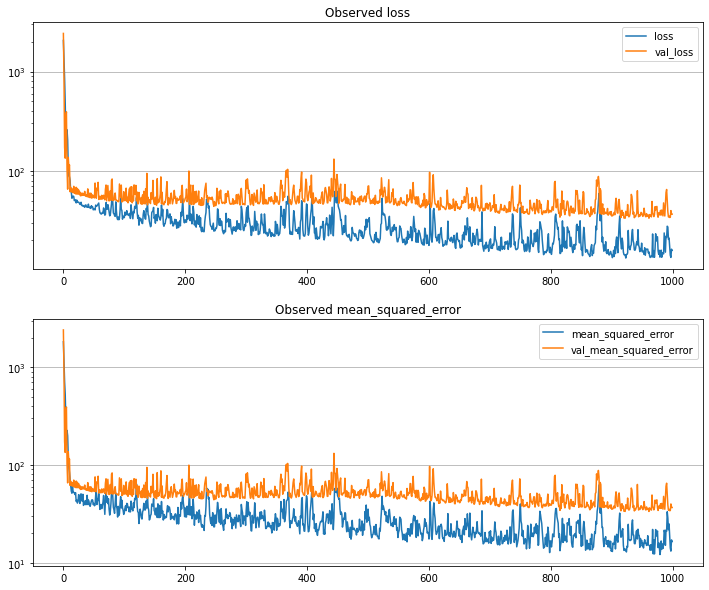

1/1 [==============================] - 0s 130ms/step - loss: 35.8976 - mean_squared_error: 35.8976


In [ ]:
# Configuring batch size and number of epochs
batch_size = 100

# Run this
model3 = run_this(batch_size)

In [ ]:
print("Model fit using batch_size = 20")
model.evaluate(
    x=X_test,
    y=y_test,
    batch_size=y_test.shape[0]
)

print("Model fit using batch_size = 40")
model2.evaluate(
    x=X_test,
    y=y_test,
    batch_size=y_test.shape[0]
)

print("Model fit using batch_size = 100")
model3.evaluate(
    x=X_test,
    y=y_test,
    batch_size=y_test.shape[0]
)

print()

Model fit using batch_size = 20
1/1 [==============================] - 0s 31ms/step - loss: 25.1355 - mean_squared_error: 25.1355
Model fit using batch_size = 40
1/1 [==============================] - 0s 23ms/step - loss: 28.6946 - mean_squared_error: 28.6946
Model fit using batch_size = 100
1/1 [==============================] - 0s 25ms/step - loss: 35.8976 - mean_squared_error: 35.8976



Observation:  
1. All models have validation metrics much higher than trained data metrics, which means all models are overfit.
2. There's a lot of training noise going on in all of these models, i.e. each training cycle makes the MSE oscillate.

In [ ]:
def plot_predict(m, suptitle=""):
    y_pred = m.predict(X_test)

    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
    fig.suptitle(suptitle)

    axs[0].scatter(x=range(0,len(y_test)), y=y_test, label="True price")
    axs[0].scatter(x=range(0,len(y_test)), y=y_pred_m1, color="orange", label="Predicted price")
    axs[0].set_title("Predicted house prices vs. true prices")
    axs[0].legend()
    axs[0].set_ylabel("Price in k$")
    axs[0].grid(b=True, which="major", axis="y")
    axs[0].set_ylim(bottom=0)

    y_range = round(np.max(np.abs(y_pred-y_test)))+10
    axs[1].scatter(x=range(0,len(y_test)), y=y_pred_m1-y_test, color="red", label="Prediction error")
    axs[1].set_ylim(bottom=-y_range, top=y_range)
    axs[1].set_title("Prediction errors")
    axs[1].set_ylabel("Error in k$")
    axs[1].grid(b=True, which="major", axis="y")
    axs[1].legend()
    axs[1].axhline(y=0, xmin=0, xmax=len(y_test), color="black", linestyle="--")

    plt.show()

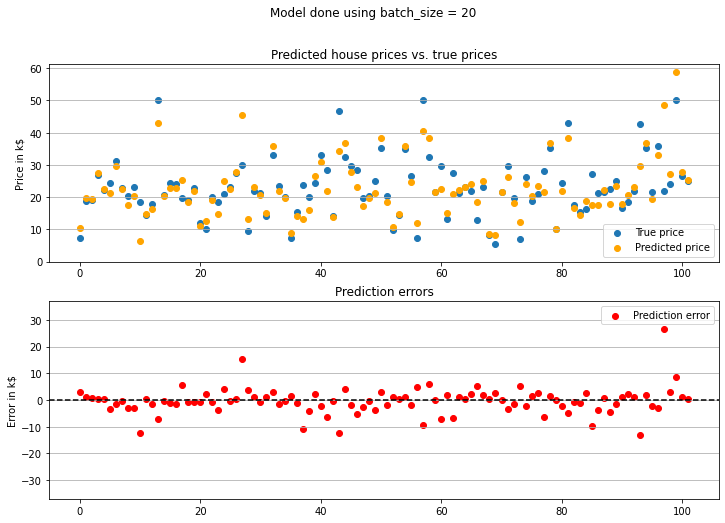

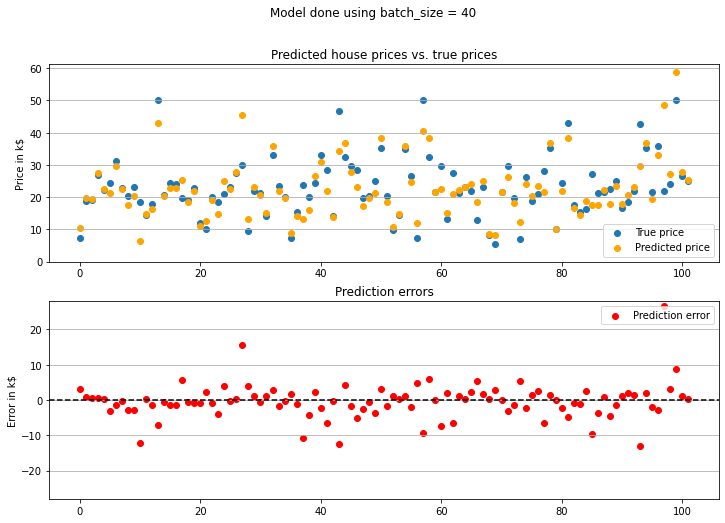

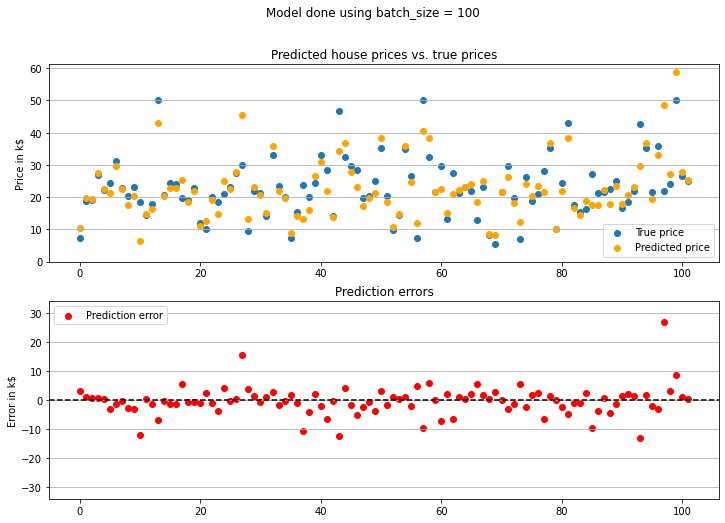

In [ ]:
plot_predict(model, "Model done using batch_size = 20")
plot_predict(model2, "Model done using batch_size = 40")
plot_predict(model3, "Model done using batch_size = 100")

### ADAM optimizer, learning_rate = 0.0001

In [ ]:
# Redefine the function to run the model

def run_this(batch_size=32, learning_rate=0.001):
    # Reinitializing the model
    m = setup_model()

    # Compiling the model
    m.compile(optimizer=Adam(learning_rate=learning_rate), loss=MeanSquaredError(), metrics=[MeanSquaredError()])

    # Fitting the model
    s = m.fit(
        X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2
    )

    show_history(s, "log")

    # Run evaluation:
    m.evaluate(x=X_test, y=y_test, batch_size=y_test.shape[0])

    return m

17/17 [==============================] - 0s 10ms/step - loss: 33.2881 - mean_squared_error: 33.2087 - val_loss: 44.6900 - val_mean_squared_error: 36.3363
Epoch 502/1000
17/17 [==============================] - 0s 14ms/step - loss: 22.4605 - mean_squared_error: 22.3929 - val_loss: 44.5186 - val_mean_squared_error: 36.6228
Epoch 503/1000
17/17 [==============================] - 0s 7ms/step - loss: 26.8354 - mean_squared_error: 26.7904 - val_loss: 46.7050 - val_mean_squared_error: 39.1794
Epoch 504/1000
17/17 [==============================] - 0s 9ms/step - loss: 27.7319 - mean_squared_error: 27.6951 - val_loss: 44.2002 - val_mean_squared_error: 36.4088
Epoch 505/1000
17/17 [==============================] - 0s 11ms/step - loss: 24.7327 - mean_squared_error: 25.2793 - val_loss: 47.1266 - val_mean_squared_error: 38.1970
Epoch 506/1000
17/17 [==============================] - 0s 10ms/step - loss: 33.2878 - mean_squared_error: 33.2210 - val_loss: 46.5003 - val_mean_squared_error: 40.7041
Epo

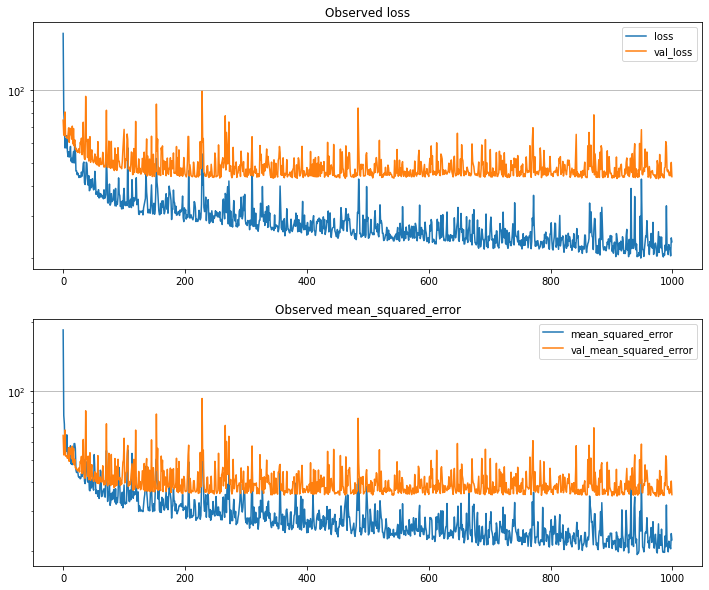

1/1 [==============================] - 0s 141ms/step - loss: 36.7177 - mean_squared_error: 36.7177


In [ ]:
model4 = run_this(20, 0.0001)

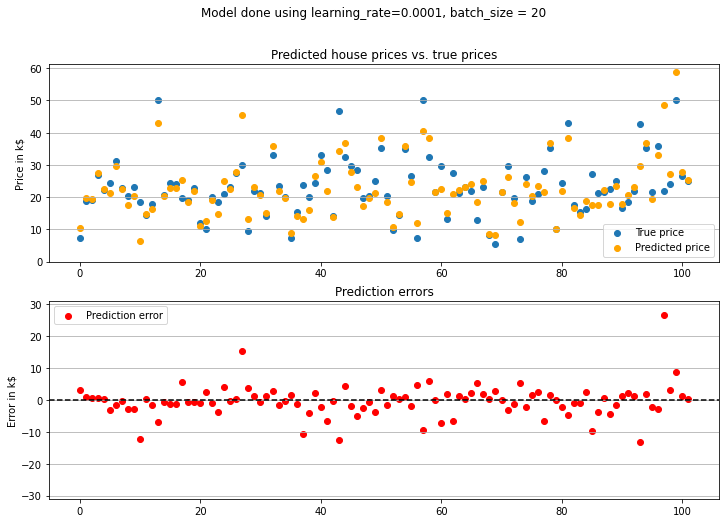

In [ ]:
plot_predict(model4, "Model done using learning_rate=0.0001, batch_size = 20")

### L2 class regularizer

In [ ]:
# We need to redefine the model architecture

def setup_model():

    # Random seed (to make each run the same unless it's None)
    seed=42

    # Number of units for hidden layers
    units              = 64
    activation         = "relu"
    kernel_initializer = RandomNormal(mean=0.0, stddev=1.0, seed=seed)
    activity_regularizer = L2(l2=0.01)

    # Instantiation of inputs (size = 13 rows)
    inputs = tf.keras.Input(
        shape=(13,),                  # Column vector with 13 elements
        name="input"                 
    )

    l1 = Dense(
        units=64,
        activation=activation,
        use_bias=True,
        kernel_initializer=kernel_initializer,
        bias_initializer="zeros",
        activity_regularizer=activity_regularizer,
        name="dense_1"
    )

    l2 = Dense(
        units=64,
        activation=activation,
        use_bias=True,
        kernel_initializer=kernel_initializer,
        bias_initializer="zeros",
        activity_regularizer=activity_regularizer,
        name="dense_2"
    )

    l3 = Dense(
        units=1,
        activation=None,
        use_bias=False,
        kernel_initializer="zeros",
        name="dense_3"
    )

    # Linking the layers in functional matter:
    l1_out  = l1(inputs)
    l2_out  = l2(l1_out)
    outputs = l3(l2_out)

    model = Model(inputs=inputs, outputs=outputs, name="model")

    return model

11/11 [==============================] - 0s 12ms/step - loss: 2838.3472 - mean_squared_error: 48.9036 - val_loss: 2202.1182 - val_mean_squared_error: 64.2407
Epoch 502/1000
11/11 [==============================] - 0s 11ms/step - loss: 2482.6002 - mean_squared_error: 55.9270 - val_loss: 2176.7007 - val_mean_squared_error: 58.7380
Epoch 503/1000
11/11 [==============================] - 0s 10ms/step - loss: 2860.4577 - mean_squared_error: 50.7488 - val_loss: 2154.5020 - val_mean_squared_error: 57.7323
Epoch 504/1000
11/11 [==============================] - 0s 10ms/step - loss: 2583.2016 - mean_squared_error: 47.6399 - val_loss: 2132.2546 - val_mean_squared_error: 59.6429
Epoch 505/1000
11/11 [==============================] - 0s 10ms/step - loss: 2860.9753 - mean_squared_error: 53.2927 - val_loss: 2110.9944 - val_mean_squared_error: 60.4097
Epoch 506/1000
11/11 [==============================] - 0s 13ms/step - loss: 2798.1273 - mean_squared_error: 55.9562 - val_loss: 2089.1021 - val_mean_

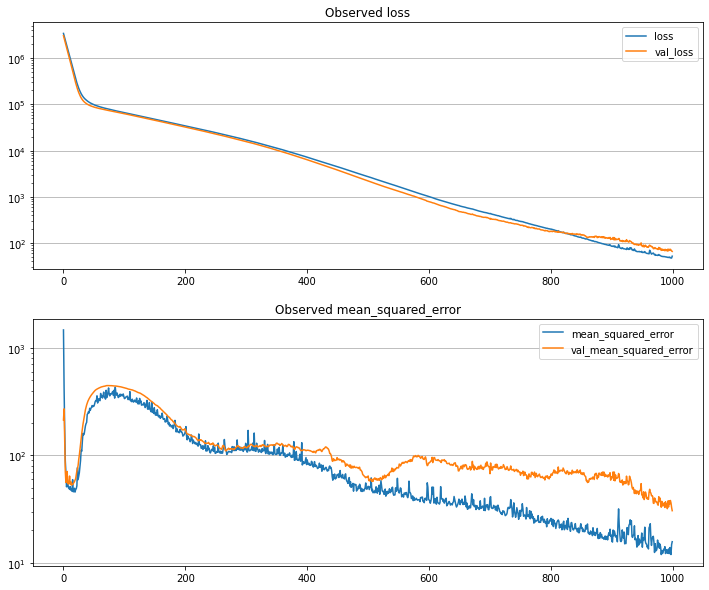

1/1 [==============================] - 0s 170ms/step - loss: 82.2097 - mean_squared_error: 47.2233


In [ ]:
# We run the model5 now
model5 = run_this()

**Commentary**:  
This just got super interesting:
1. It looks like the model was fitting with MSE of ~ 50 and then it shoot to almost 400 in couple dozens of epochs 
2. Then it started to converge
3. Looks like we didn't yet hit the sweet spot, I'd like to re-run it with another +1000 epochs to see how it goes from here.

### L2 class regularizer + 2000 epochs

In [ ]:
# Redefine the function to run the model

def run_this(batch_size=32, epochs=1000, learning_rate=0.001):
    # Reinitializing the model
    m = setup_model()

    # Compiling the model
    m.compile(optimizer=Adam(learning_rate=learning_rate), loss=MeanSquaredError(), metrics=[MeanSquaredError()])

    # Fitting the model
    s = m.fit(
        X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2
    )

    show_history(s, "log")

    # Run evaluation:
    m.evaluate(x=X_test, y=y_test, batch_size=y_test.shape[0])

    return m

11/11 [==============================] - 0s 12ms/step - loss: 13.2014 - mean_squared_error: 6.2940 - val_loss: 233.6688 - val_mean_squared_error: 188.5313
Epoch 1502/2000
11/11 [==============================] - 0s 20ms/step - loss: 13.6186 - mean_squared_error: 7.1150 - val_loss: 224.9133 - val_mean_squared_error: 181.2487
Epoch 1503/2000
11/11 [==============================] - 0s 10ms/step - loss: 15.4444 - mean_squared_error: 8.1204 - val_loss: 223.7635 - val_mean_squared_error: 180.4815
Epoch 1504/2000
11/11 [==============================] - 0s 10ms/step - loss: 15.0192 - mean_squared_error: 7.6146 - val_loss: 221.7053 - val_mean_squared_error: 179.0090
Epoch 1505/2000
11/11 [==============================] - 0s 11ms/step - loss: 14.9734 - mean_squared_error: 8.7981 - val_loss: 227.2628 - val_mean_squared_error: 183.5412
Epoch 1506/2000
11/11 [==============================] - 0s 10ms/step - loss: 16.2729 - mean_squared_error: 8.8023 - val_loss: 228.7919 - val_mean_squared_error:

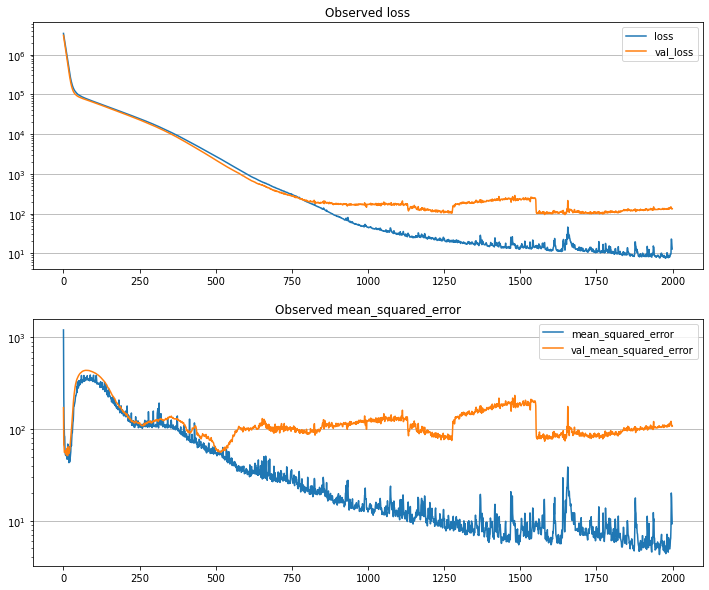

1/1 [==============================] - 0s 224ms/step - loss: 56.0860 - mean_squared_error: 51.6301


In [ ]:
# Model 6 = Model 5 + 1000 extra epochs
model6 = run_this(batch_size=32, epochs=2000)

**Commentary**:
1. It gets to around 500 epochs in good way, but then the regularization ceases to work.

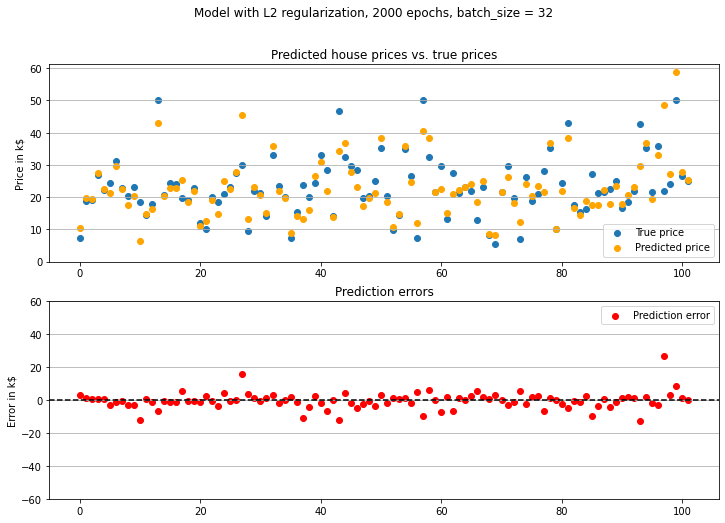

In [ ]:
plot_predict(model6, "Model with L2 regularization, 2000 epochs, batch_size = 32")

### introduce Dropout layers

In [ ]:
# We need to redefine the model architecture

def setup_model():

    # Random seed (to make each run the same unless it's None)
    seed=42

    # Number of units for hidden layers
    units              = 64
    activation         = "relu"
    kernel_initializer = RandomNormal(mean=0.0, stddev=1.0, seed=seed)
    activity_regularizer = L2(l2=0.01)

    # Instantiation of inputs (size = 13 rows)
    inputs = tf.keras.Input(
        shape=(13,),                  # Column vector with 13 elements
        name="input"                 
    )

    l1 = Dense(
        units=64,
        activation=activation,
        use_bias=True,
        kernel_initializer=kernel_initializer,
        bias_initializer="zeros",
        activity_regularizer=activity_regularizer,
        name="dense_1"
    )

    d1 = Dropout(0.5)

    l2 = Dense(
        units=64,
        activation=activation,
        use_bias=True,
        kernel_initializer=kernel_initializer,
        bias_initializer="zeros",
        activity_regularizer=activity_regularizer,
        name="dense_2"
    )

    d2 = Dropout(0.5)

    l3 = Dense(
        units=1,
        activation=None,
        use_bias=False,
        kernel_initializer="zeros",
        name="dense_3"
    )

    # Linking the layers in functional matter:
    l1_out  = l1(inputs)
    d1_out  = d1(l1_out)
    l2_out  = l2(d1_out)
    d2_out  = d2(l2_out)
    outputs = l3(d2_out)

    model = Model(inputs=inputs, outputs=outputs, name="model")

    return model

11/11 [==============================] - 0s 12ms/step - loss: 594.9340 - mean_squared_error: 241.1698 - val_loss: 487.6879 - val_mean_squared_error: 299.5553
Epoch 802/1300
11/11 [==============================] - 0s 10ms/step - loss: 675.4832 - mean_squared_error: 231.8558 - val_loss: 481.4654 - val_mean_squared_error: 294.7599
Epoch 803/1300
11/11 [==============================] - 0s 12ms/step - loss: 568.4245 - mean_squared_error: 247.2827 - val_loss: 478.3072 - val_mean_squared_error: 292.7233
Epoch 804/1300
11/11 [==============================] - 0s 9ms/step - loss: 590.4462 - mean_squared_error: 238.0209 - val_loss: 490.5840 - val_mean_squared_error: 307.0995
Epoch 805/1300
11/11 [==============================] - 0s 9ms/step - loss: 640.2657 - mean_squared_error: 262.2385 - val_loss: 480.5972 - val_mean_squared_error: 298.8456
Epoch 806/1300
11/11 [==============================] - 0s 10ms/step - loss: 569.9060 - mean_squared_error: 216.1884 - val_loss: 486.6608 - val_mean_squ

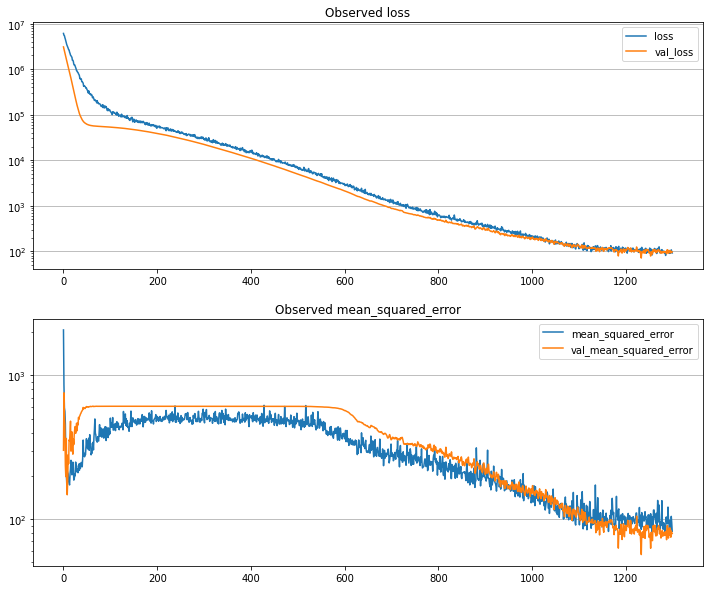

1/1 [==============================] - 0s 197ms/step - loss: 100.7179 - mean_squared_error: 97.2977


In [ ]:
# Model 7 = batch_size(32), epochs(1300)
model7 = run_this(batch_size=32, epochs=1300)

**Commentary**:  
This converges really nice. Training loss is very similar to validation loss.

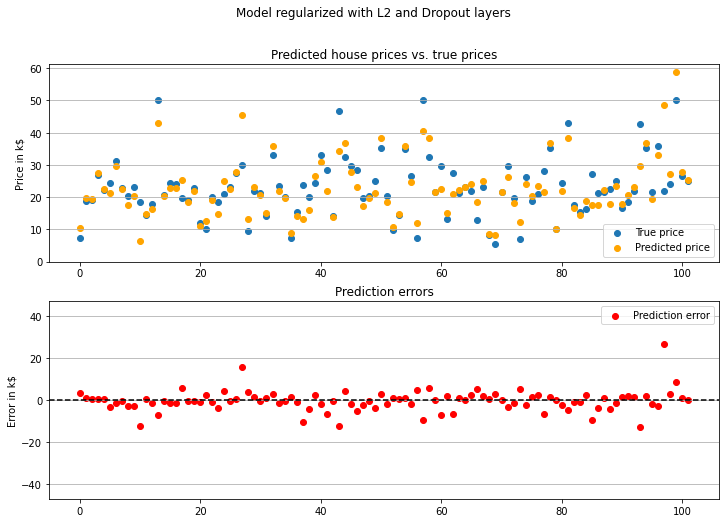

In [ ]:
plot_predict(model7, "Model regularized with L2 and Dropout layers")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87989bd7-7a25-4e61-b3c0-cb24ea7ca1f8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>